# Import libraries - os, numpy, pandas, matplotlib and seaborn

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Changing the working directory where the dataset is located
os.chdir('C:/Users/Suyash-PC/Desktop/congressional-election-disbursements')

# Loading and cleaning the dataset for year 2010

The current dataset contains information about disbursements that spread across time and seggregated by geological information plus information about congressional parties involved. The dataset may not contain perfect data for analysis and requires cleaning to make it usable to perform analysis. Following are some operation which we will perform to make the data fit for analysis:
    
1. Ignore records which are missing 'amount' and do not contain 'date'            
2. Filter records which are relevant to the year for which data is collected - we don't need historic records or dates which represent activity in the future
3. Convert currency to float for numerical data processing

In [3]:
df_hs_exp_2010 = pd.read_csv('all_house_senate_2010.csv', na_values='0', index_col='tra_id', sep=',', low_memory=False)

# Filter rows having null or NaN in the date and amount field
df_hs_exp_2010 = df_hs_exp_2010.dropna(subset = ['dis_dat', 'dis_amo'])

# Filter records relevant to year 2010
df_hs_exp_2010 = df_hs_exp_2010[df_hs_exp_2010['dis_dat'].apply(lambda x: x[0:4]) == '2010']

# Format the datatime column for time series analysis
df_hs_exp_2010['dis_dat'] = pd.to_datetime(df_hs_exp_2010['dis_dat'], format='%Y-%m-%d')

# Format the currency field to convert them to float
df_hs_exp_2010['dis_amo'] = (df_hs_exp_2010['dis_amo'].replace( '[\$,)]','', regex=True ).replace( '[(]','-',   regex=True ).astype(float))

# Applying same modifications to 2012, 2014 and 2016 datasets

In [4]:
df_hs_exp_2012 = pd.read_csv('all_house_senate_2012.csv', na_values='0', index_col='tra_id', sep=',', parse_dates=['dis_dat'],low_memory=False)
df_hs_exp_2012 = df_hs_exp_2012.dropna(subset = ['dis_dat', 'dis_amo'])
df_hs_exp_2012 = df_hs_exp_2012[df_hs_exp_2012['dis_dat'].apply(lambda x: x[0:4]) == '2012'] #relevant 2012 records
df_hs_exp_2012['dis_dat'] = pd.to_datetime(df_hs_exp_2012['dis_dat'], format='%Y-%m-%d')
df_hs_exp_2012['dis_amo'] = (df_hs_exp_2012['dis_amo'].replace( '[\$,)]','', regex=True ).replace( '[(]','-',   regex=True ).astype(float))

In [5]:
df_hs_exp_2014 = pd.read_csv('all_house_senate_2014.csv', na_values='0', index_col='tra_id', sep=',',low_memory=False)
df_hs_exp_2014 = df_hs_exp_2014.dropna(subset = ['dis_dat', 'dis_amo'])
df_hs_exp_2014 = df_hs_exp_2014[df_hs_exp_2014['dis_dat'].apply(lambda x: x[0:4]) == '2014'] #relevant 2014 records
df_hs_exp_2014['dis_dat'] = pd.to_datetime(df_hs_exp_2014['dis_dat'], format='%Y-%m-%d')
df_hs_exp_2014['dis_amo'] = (df_hs_exp_2014['dis_amo'].replace( '[\$,)]','', regex=True ).replace( '[(]','-',   regex=True ).astype(float))

In [6]:
df_hs_exp_2016 = pd.read_csv('all_house_senate_2016.csv', na_values='0', index_col='tra_id', sep=',',low_memory=False, encoding = "ISO-8859-1")
df_hs_exp_2016 = df_hs_exp_2016.dropna(subset = ['dis_dat', 'dis_amo'])
df_hs_exp_2016 = df_hs_exp_2016[df_hs_exp_2016['dis_dat'].apply(lambda x: x[0:4]) == '2016'] #relevant 2016 records
df_hs_exp_2016['dis_dat'] = pd.to_datetime(df_hs_exp_2016['dis_dat'], format='%Y-%m-%d')
df_hs_exp_2016['dis_amo'] = (df_hs_exp_2016['dis_amo'].replace( '[\$,)]','', regex=True ).replace( '[(]','-',   regex=True ).astype(float))

# Checking for empty, missing or null values 

In [7]:
df_hs_exp_2010.isnull().sum()

com_id              0
com_nam             0
can_id              0
can_nam             0
ele_yea             0
can_off             0
can_off_sta         0
can_off_dis         0
lin_num             0
lin_ima             0
rec_com_id     573306
rec_nam            39
rec_str1         5075
rec_str2       538228
rec_cit          3154
rec_sta          3157
rec_zip          5240
dis_dat             0
dis_amo             0
dis_pur_des      5129
mem_cod        496481
mem_tex        490319
cat_cod        374713
cat_des        379792
bac_ref_id     559668
dtype: int64

In [8]:
df_hs_exp_2012.isnull().sum()

com_id              0
com_nam             0
can_id              0
can_nam             0
ele_yea             0
can_off             0
can_off_sta         0
can_off_dis         0
lin_num             0
lin_ima             0
rec_com_id     604537
rec_nam            24
rec_str1         4597
rec_str2       533084
rec_cit          2870
rec_sta          2881
rec_zip          4768
dis_dat             0
dis_amo             0
dis_pur_des      3595
mem_cod        484269
mem_tex        488579
cat_cod        364699
cat_des        365643
bac_ref_id     558457
dtype: int64

In [9]:
df_hs_exp_2014.isnull().sum()

com_id              0
com_nam             0
can_id              0
can_nam             0
ele_yea             0
can_off             0
can_off_sta         0
can_off_dis         1
lin_num             0
lin_ima             0
rec_com_id     522144
rec_nam            16
rec_str1         3006
rec_str2       448123
rec_cit          1973
rec_sta          2033
rec_zip          3359
dis_dat             0
dis_amo             0
dis_pur_des      2245
mem_cod        407439
mem_tex        427670
cat_cod        318561
cat_des        319600
bac_ref_id     476036
dtype: int64

In [10]:
df_hs_exp_2016.isnull().sum()

com_id              0
com_nam             0
can_id              0
can_nam             0
ele_yea             0
can_off             0
can_off_sta         0
can_off_dis       636
lin_num             0
lin_ima             0
rec_com_id     532662
rec_nam           291
rec_str1         2496
rec_str2       447127
rec_cit          1793
rec_sta          2707
rec_zip          3377
dis_dat             0
dis_amo             0
dis_pur_des      2971
mem_cod        402637
mem_tex        474558
cat_cod        347898
cat_des        348077
bac_ref_id     463636
dtype: int64

Based on the observation on the null value count, we find that Committee ID, Committee Name, Candidate ID, Candidate name, Election year, Candidate Office, Candidate Office State, Candidate Office District, Date of disbursement, Amount of disbursement are reasonably good as they contain minimum missing values. Also we shall not be using 'ID' column as part of visualization since it does not provide meaningful interpretation.

# Disbursements seggregated by Congressional Offices
   
We would now aggregate the disbursement amounts by offices  - House, President and Senate and plot a bar graph to do a comparative analysis

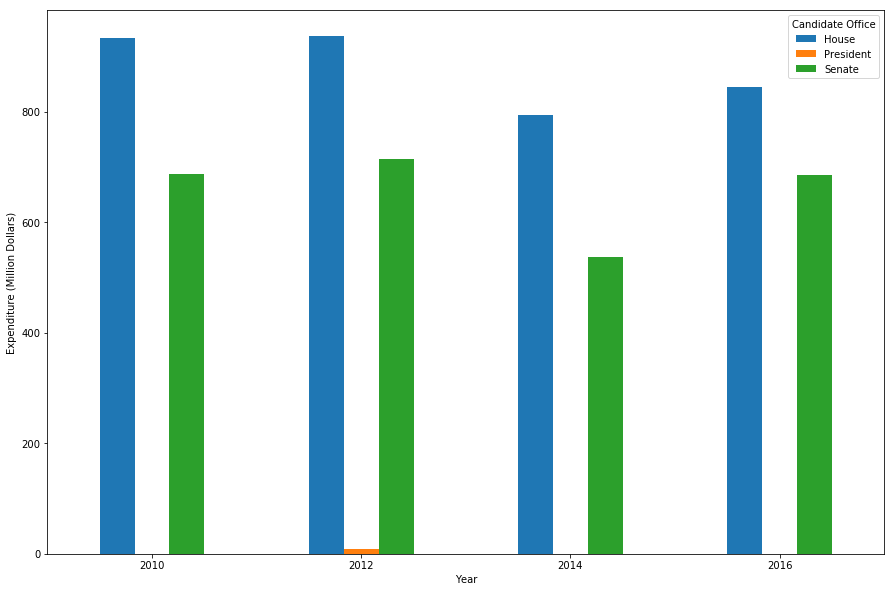

In [11]:
# Setting the figure size for the plot
plt.rcParams["figure.figsize"] = [15, 10]

# Caluclating sumtotal of disbursements by each office in Million Dollars 
disbursements_2010 = pd.DataFrame(df_hs_exp_2010.groupby(['can_off', 'ele_yea'])['dis_amo'].sum()/1000000).reset_index().rename(index=str, columns={"can_off": "Candidate Office"})
disbursements_2012 = pd.DataFrame(df_hs_exp_2012.groupby(['can_off', 'ele_yea'])['dis_amo'].sum()/1000000).reset_index().rename(index=str, columns={"can_off": "Candidate Office"})
disbursements_2014 = pd.DataFrame(df_hs_exp_2014.groupby(['can_off', 'ele_yea'])['dis_amo'].sum()/1000000).reset_index().rename(index=str, columns={"can_off": "Candidate Office"})
disbursements_2016 = pd.DataFrame(df_hs_exp_2016.groupby(['can_off', 'ele_yea'])['dis_amo'].sum()/1000000).reset_index().rename(index=str, columns={"can_off": "Candidate Office"})

# Temporary holder for all disbursments
frames = [
            disbursements_2010[['ele_yea', 'Candidate Office', 'dis_amo']], 
            disbursements_2012[['ele_yea', 'Candidate Office', 'dis_amo']],
            disbursements_2014[['ele_yea', 'Candidate Office', 'dis_amo']],
            disbursements_2016[['ele_yea', 'Candidate Office', 'dis_amo']]
         ]

# Combining dataframes into single source
df = pd.concat(frames)

#Renaming abbrevations for H, S and P - House, President and Senate respectively
df['Candidate Office'] = df['Candidate Office'].replace(['H', 'P', 'S'], ['House', 'President','Senate'])

# Pivot the table so as to get disbursement amounts by years 
df = df.pivot(index='ele_yea', columns='Candidate Office', values='dis_amo')

#Plotting the bar graph
df.plot.bar()

# Configuring the axes for the chart
plt.xlabel("Year")
plt.xticks(rotation = 'horizontal')
plt.ylabel("Expenditure (Million Dollars)")

plt.show()
plt.gcf().clear()

As you can see from the distribution, the disbursements from House and Senate Offices are much higher that Presidential Office. In fact data for President Office is not available for 2010, 2014 and 2016. Also, House Office disbursements exceed that of Senate in all these years. The highest spending occured in 2010, 2012 and 2014 is comparatively the lowest.

# Plotting trendline of disbursments over entire year

As disbursements are attached to date, it would be insightful to see the pattern the disbusrsements occur over the entire year.

In [12]:
import datetime
import matplotlib.pyplot as plt
import numpy as np

import plotly.plotly as py
import plotly.tools as tls

In [13]:
#Summing amounts (in million dollars) by date to create a timeseries trendline for 2010
df_2010 = pd.DataFrame(df_hs_exp_2010.groupby('dis_dat')['dis_amo'].sum()).reset_index()
df_series_2010 = pd.Series(np.array(df_2010['dis_amo']/1000000), np.array(df_2010['dis_dat']))

#Summing amounts (in million dollars) by date to create a timeseries trendline for 2012
df_2012 = pd.DataFrame(df_hs_exp_2012.groupby('dis_dat')['dis_amo'].sum()).reset_index()
df_series_2012 = pd.Series(np.array(df_2012['dis_amo']/1000000), np.array(df_2012['dis_dat']))

#Summing amounts (in million dollars) by date to create a timeseries trendline for 2014
df_2014 = pd.DataFrame(df_hs_exp_2014.groupby('dis_dat')['dis_amo'].sum()).reset_index()
df_series_2014 = pd.Series(np.array(df_2014['dis_amo']/1000000), np.array(df_2014['dis_dat']))

#Summing amounts (in million dollars) by date to create a timeseries trendline for 2016
df_2016 = pd.DataFrame(df_hs_exp_2016.groupby('dis_dat')['dis_amo'].sum()).reset_index()
df_series_2016 = pd.Series(np.array(df_2016['dis_amo']/1000000), np.array(df_2016['dis_dat']))

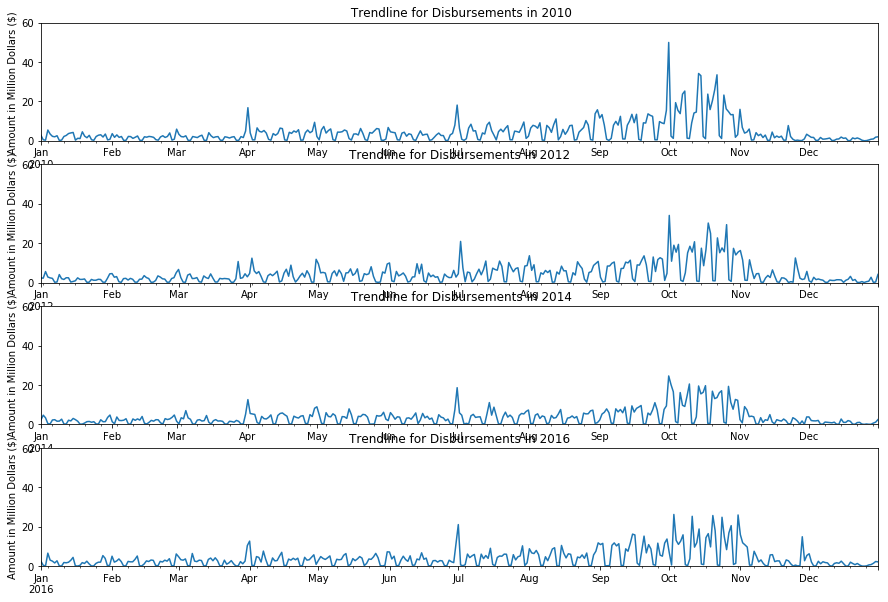

In [14]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(nrows = 4, ncols = 1)

plt.rcParams["figure.figsize"] = [15, 30]
ax1.set_ylim(0,60)
ax1.set_title(' Trendline for Disbursements in 2010')
ax1.set_ylabel('Amount in Million Dollars ($)')

ax2.set_ylim(0,60)
ax2.set_title('Trendline for Disbursements in 2012')
ax2.set_ylabel('Amount in Million Dollars ($)')

ax3.set_ylim(0,60)
ax3.set_title(' Trendline for Disbursements in 2014')
ax3.set_ylabel('Amount in Million Dollars ($)')

ax4.set_ylim(0,60)
ax4.set_title('Trendline for Disbursements in 2016')
ax4.set_ylabel('Amount in Million Dollars ($)')

df_series_2010.plot(ax=ax1)
df_series_2012.plot(ax=ax2)
df_series_2014.plot(ax=ax3)
df_series_2016.plot(ax=ax4)

plt.show()
plt.gcf().clear()

From the plots it is observed that the disbursements show an increased activity in months September to first week of November. It is interesting observation as it shows the reason behind the spending as this is the period nearing the elections.

# Box Plot Analysis

The box plots help us understand the range where majority of disbursement amount lie and help identify an irregular data points

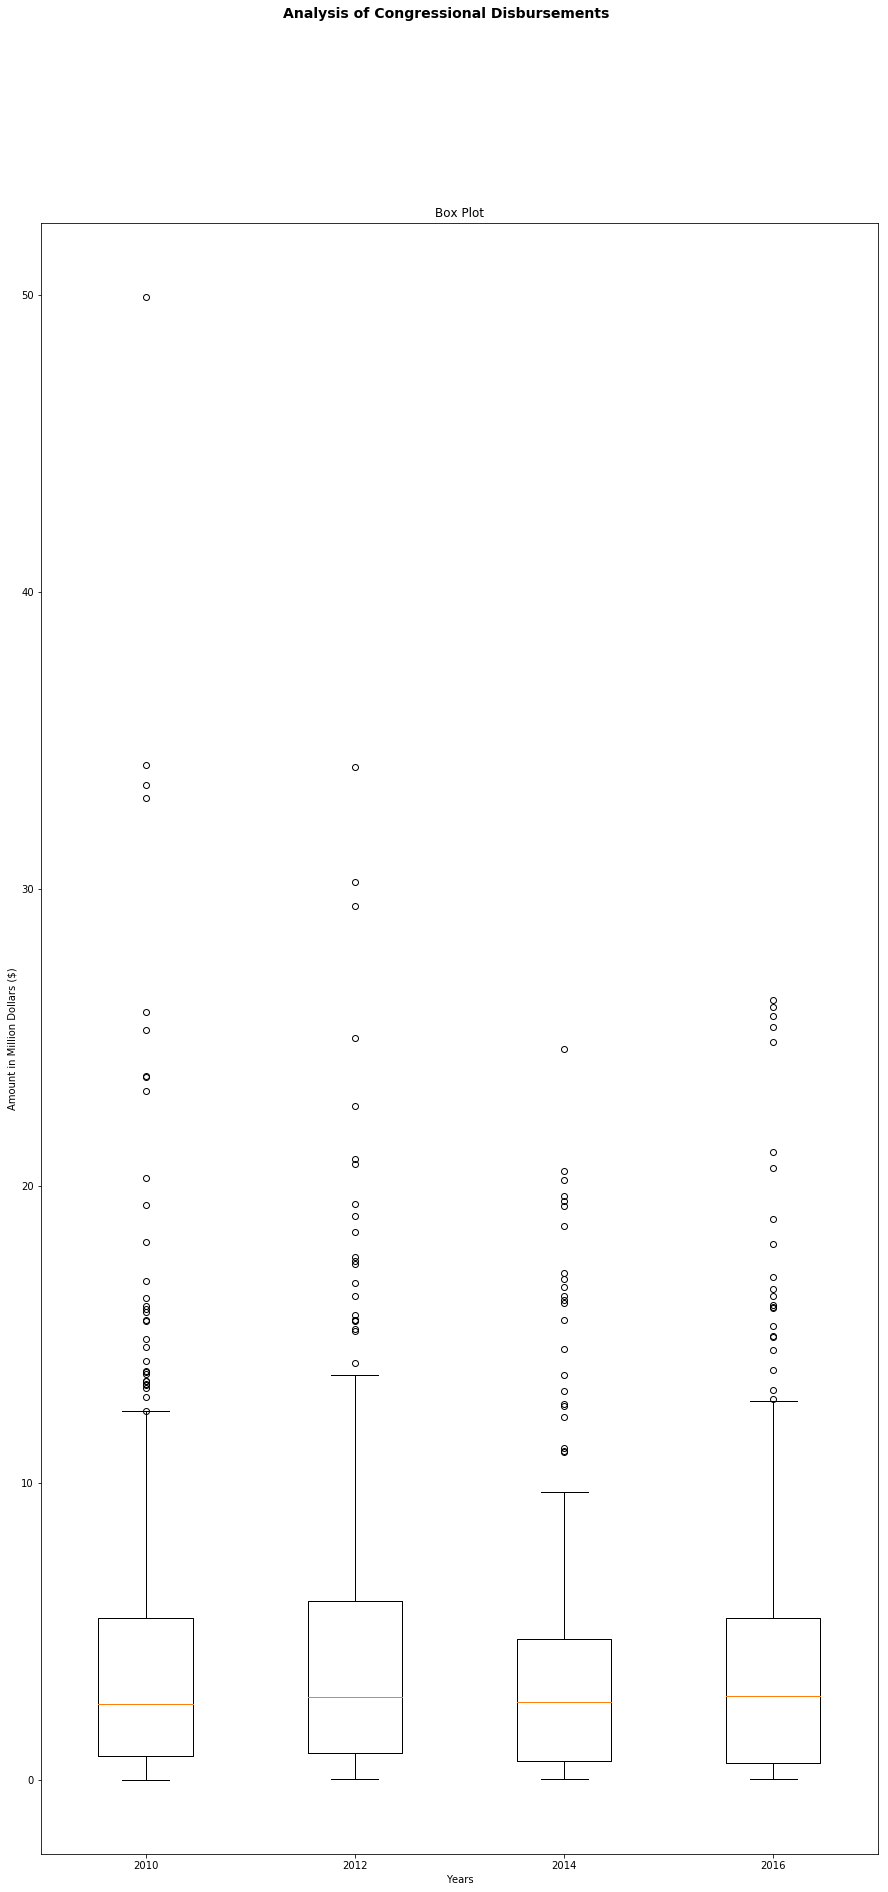

In [15]:
#Setting up the parameters for figure plot
fig = plt.figure()
fig.suptitle('Analysis of Congressional Disbursements', fontsize=14, fontweight='bold')
ax = fig.add_subplot(111)

plt.rcParams["figure.figsize"] = [10, 8]

# Creating data from time series data
data = [df_series_2010, df_series_2012, df_series_2014, df_series_2016]

ax.boxplot(data)
ax.set_title('Box Plot')
ax.set_xlabel('Years')
ax.set_ylabel('Amount in Million Dollars ($)')
ax.set_xticks([1, 2, 3, 4])
ax.set_xticklabels(['2010', '2012', '2014', '2016'])

plt.show()
plt.gcf().clear()

As we can see from the plots, majority of the disbursements occur between 1 to 7 Million Dollars. There are few heavy disbursements (which are the outliers) that constitute for spike in the spendings by committees.

2010 : Disbursement amounts lying roughly in 12 - 50 Million Dollars

2012 : Disbursement amounts in range of 13 - 35 Million Dollars

2014 : Disbursement amounts in range of 10 - 25 Million Dollars

2016 : Disbursement amounts in range of 12 - 27 Million Dollars

# Plotting histograms

Histograms are very helpful to plot the frequency of disbursements within certain range. For this analysis we are going to split disbursements in 15 compartments and try to measure how frequent are the spendings in that range

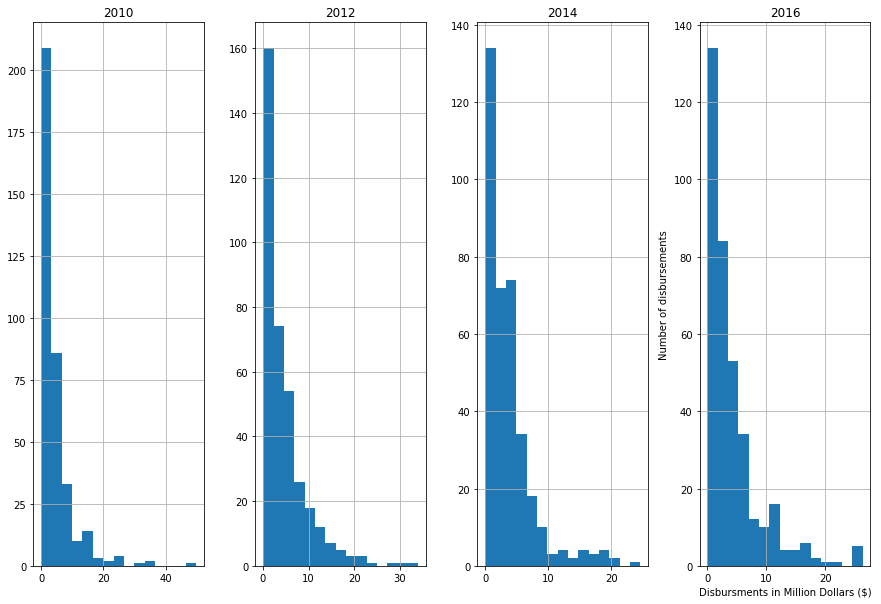

In [16]:
plt.rcParams["figure.figsize"] = [15, 10]

# Specifying the number of bins 
num_bins = 15

# Creating a temporary dataframe to hold the disbursement data for years 2010, 2012, 2014 and 2016
df = pd.DataFrame({'2010':df_series_2010,'2012':df_series_2012, '2014':df_series_2014, '2016':df_series_2016})

# Plotting the histogram for the dataframe
df.hist(bins= num_bins, layout=(1,4))

plt.xlabel("Disbursments in Million Dollars ($)")
plt.ylabel('Number of disbursements')

plt.show()
plt.gcf().clear()

All the distributions are heavily skewed towards right with majority of disbursements, at a lower range i.e. between 0 - 20 Million Dollars.  In 2010, we see the highest amount of disbursement go beyond 50 Million dollars.

# Refunds
There are many transactions in the dataset which bear a negative disbursements value. These are essentially refunds or voided checks i.e. the transactions which were reverted.

In [17]:
# Calculating the refunded amounts for 2010, 2012, 2014 and 2016
refunds_2010 = df_hs_exp_2010[(df_hs_exp_2010['dis_amo']< 0)].reset_index()
refunds_2012 = df_hs_exp_2012[(df_hs_exp_2012['dis_amo']< 0)].reset_index()
refunds_2014 = df_hs_exp_2014[(df_hs_exp_2014['dis_amo']< 0)].reset_index()
refunds_2016 = df_hs_exp_2016[(df_hs_exp_2016['dis_amo']< 0)].reset_index()

# Coverting negative amount to positive for plotting
refunds_2010['dis_amo'] = -1 * refunds_2010['dis_amo']
refunds_2012['dis_amo'] = -1 * refunds_2012['dis_amo']
refunds_2014['dis_amo'] = -1 * refunds_2014['dis_amo']
refunds_2016['dis_amo'] = -1 * refunds_2016['dis_amo']

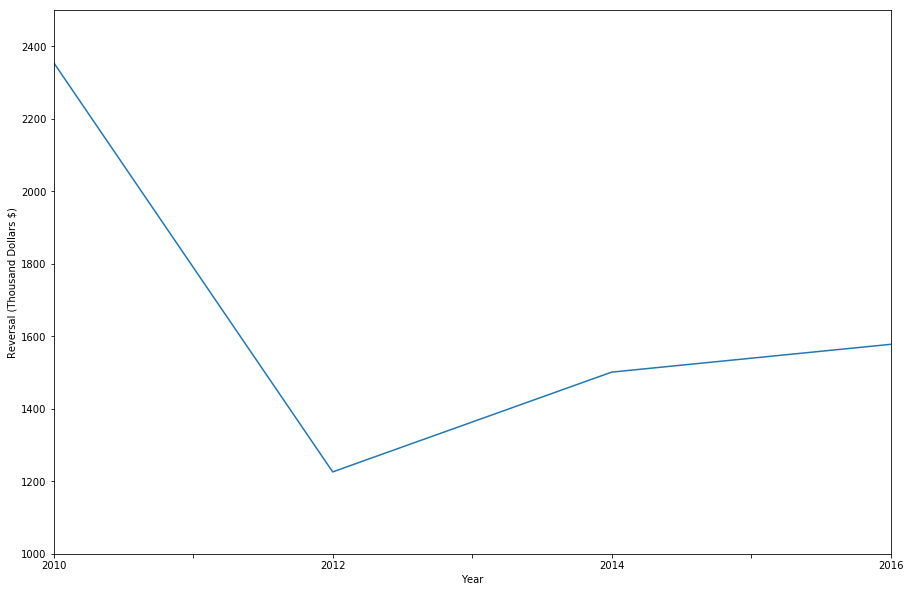

In [50]:
refunds = pd.DataFrame({'year' :['2010', '2012', '2014', '2016'],  
                        'refund' : [refunds_2010['dis_amo'].sum()/1000, refunds_2012['dis_amo'].sum()/1000, 
                                    refunds_2014['dis_amo'].sum()/1000, refunds_2016['dis_amo'].sum()/1000] })

# Setting legend to false as there is only one line to be plotted
refunds.plot.line(x='year', y='refund', legend=False)

# Configuring the axes for the chart
plt.xlabel("Year")
plt.ylim(1000,2500)
plt.xticks(rotation = 'horizontal')
plt.ylabel("Reversal (Thousand Dollars $)")

plt.show()
plt.gcf().clear()

We can observe that in 2010, there were highest number of disbursement reversals. 

# Bubble plot

Bubble plot is useful in comparing more that two dimensions in a 2-D space. Here we are trying to analyze the how diversified were the disbursements in terms of  - how many states that committee did disbursements into and how many types of disbursments were involved. For this we use the state information from the recepeint state code and unique disbursement description (salary, postage, etc) to measure the diversity.

We shall take top the 10 committees (by overall disbursement amount) each year and analyze their disbursement patterns.

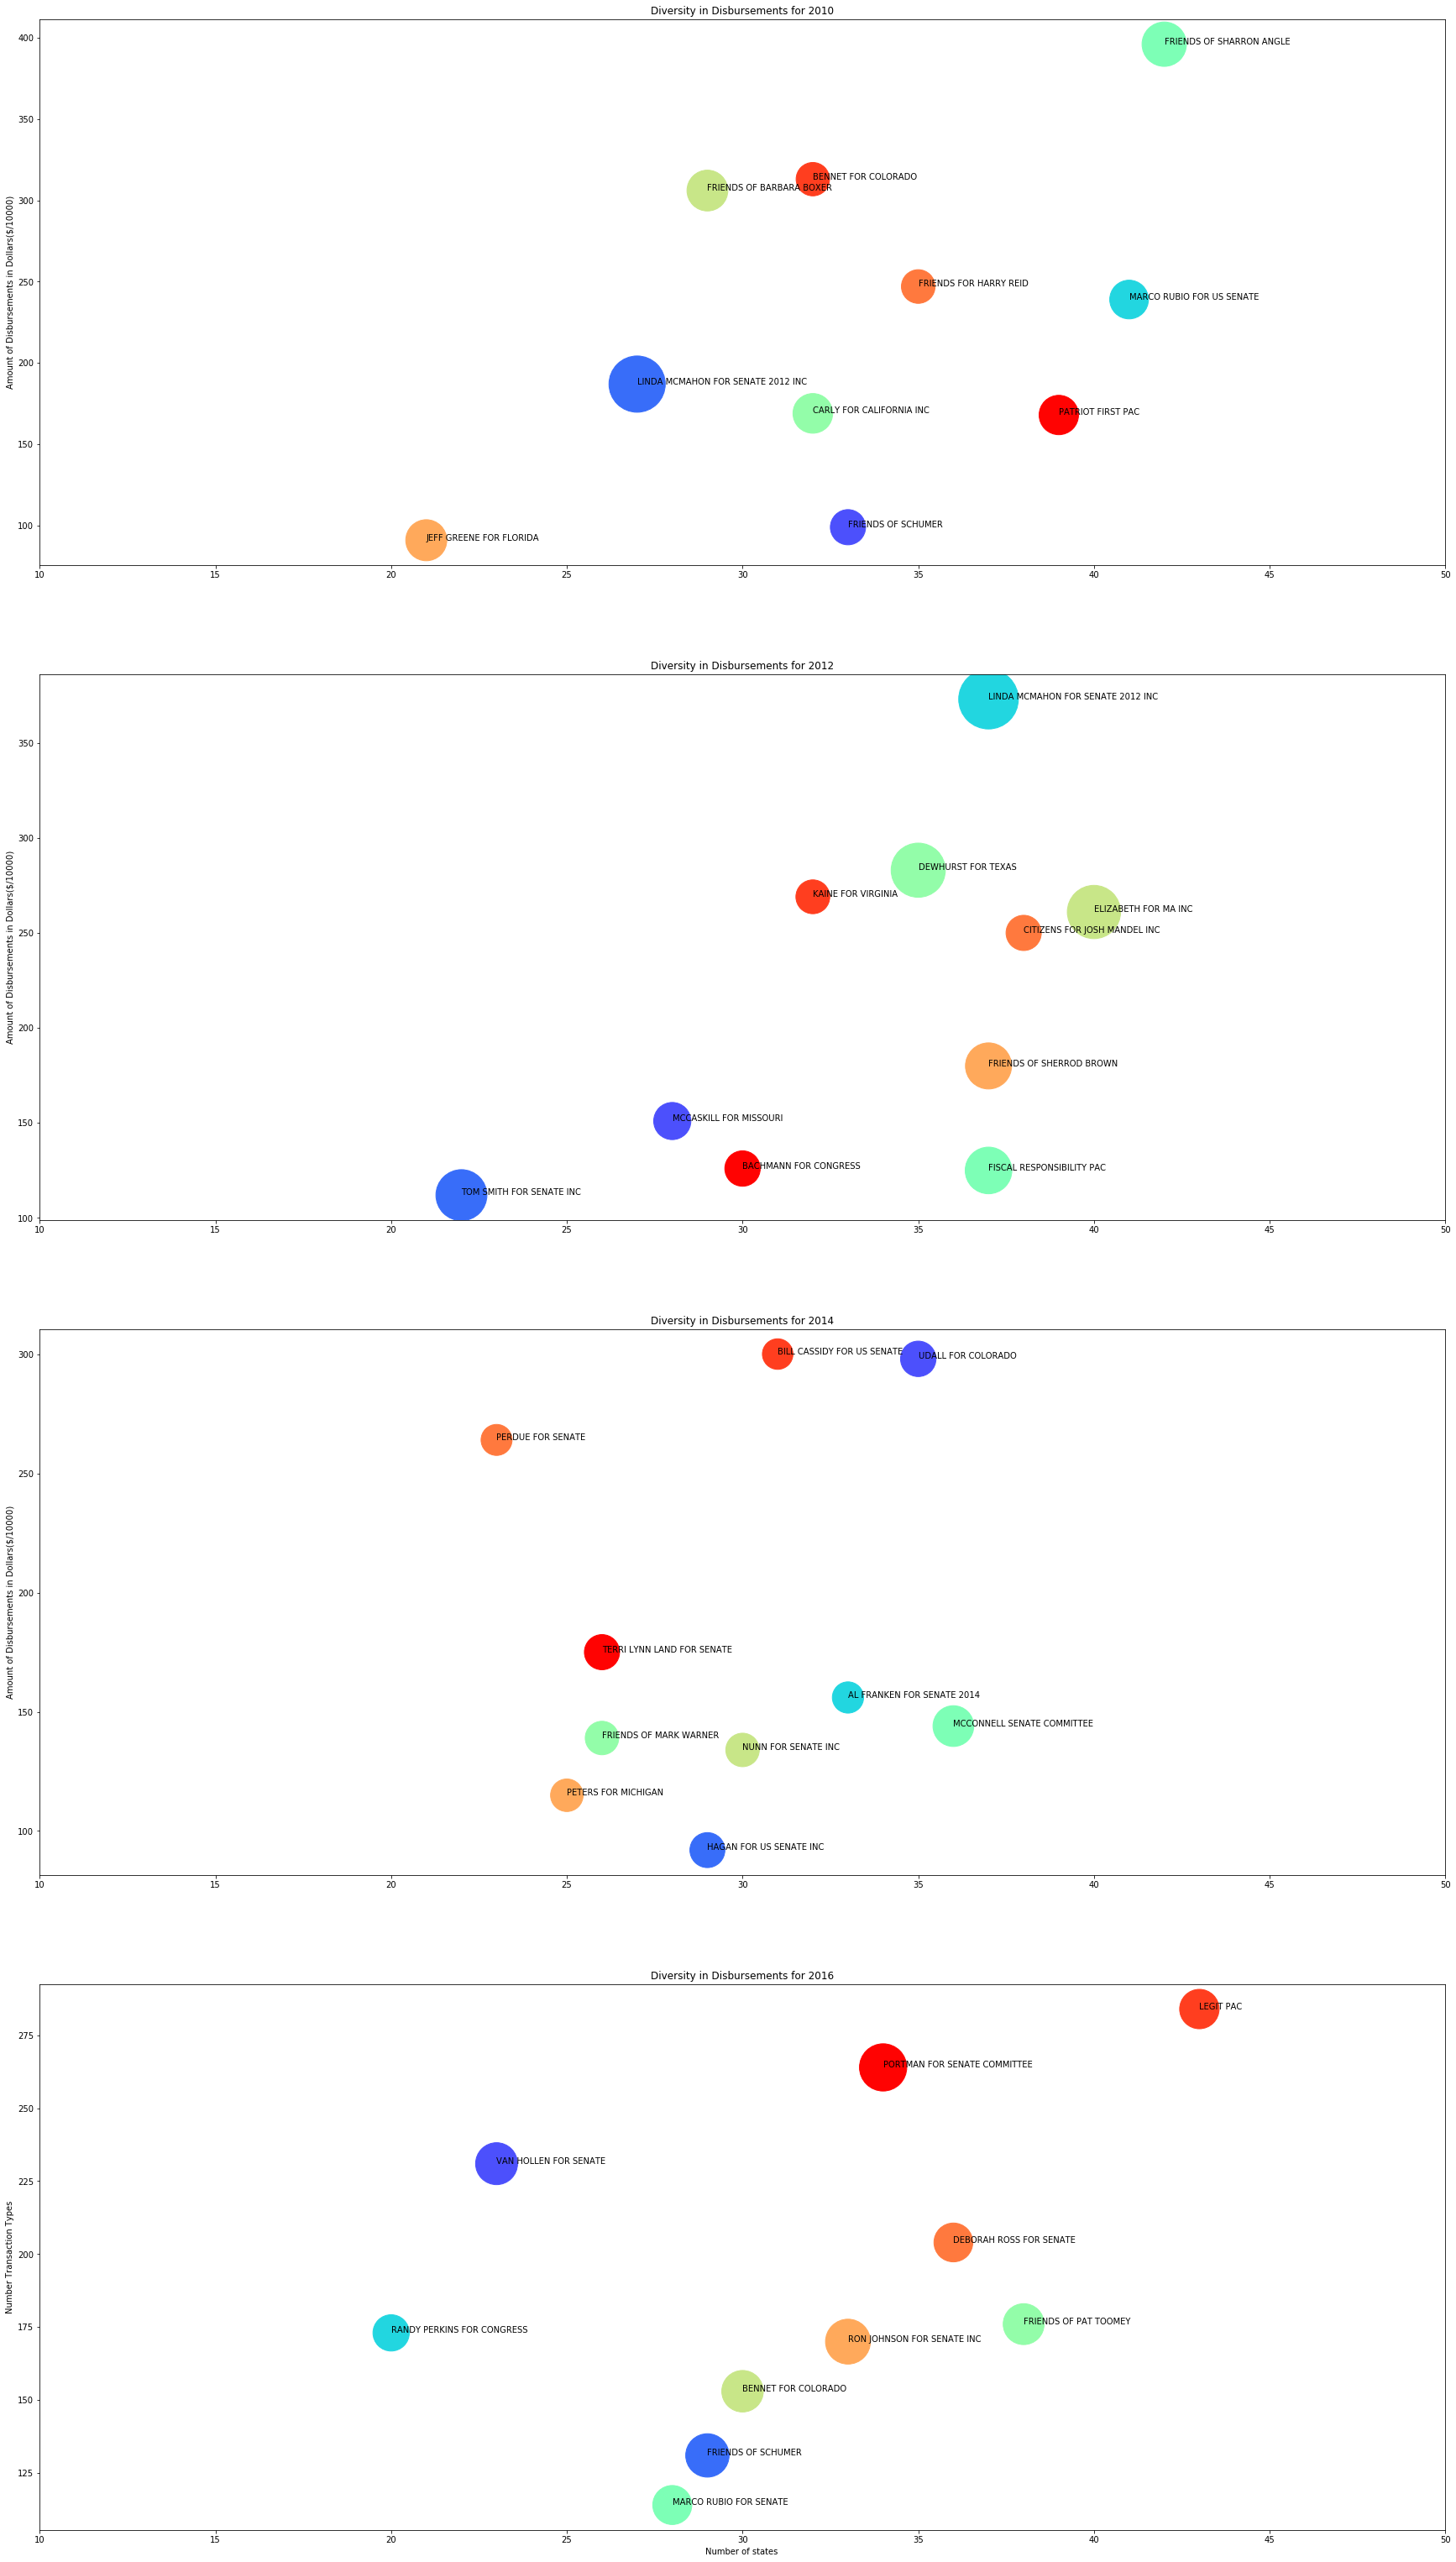

In [20]:
import matplotlib.cm as cm

fig, axes = plt.subplots(nrows = 4, ncols = 1, figsize=(30,55))

N=10
count = 0
year = ['2010', '2012', '2014', '2016']
colors=cm.rainbow(np.random.rand(N))

# Grouping the dataset by Committee Name to calculate count of states, total disbursement amount and unique disbursement descriptions
df_2010 = df_hs_exp_2010.groupby(['com_nam']).agg({"rec_sta" : lambda x: x.nunique(), "dis_amo" : np.sum, "dis_pur_des" : pd.Series.nunique})

# Getting top 10 committees by the disbursement amounts
df_2010 = df_2010.sort_values(by=['dis_amo', 'dis_pur_des', 'rec_sta'], ascending=False).head(N)

# Dividing the amount to fit the graph by 10000
df_2010['dis_amo'] = df_2010['dis_amo']/10000

# Sorting the dataset by the purpose index, amount, number of descriptions and states
df_2010 = df_2010.sort_values(by=['dis_amo', 'dis_pur_des', 'rec_sta'], ascending=False)

# Coverting groupby dataframe to regular dataframe; adding suffix _col to each of the columns
df_2010 = df_2010.add_suffix('_col').reset_index()

#Performing similar operations on remaining datasets
df_2012 = df_hs_exp_2012.groupby(['com_nam']).agg({"rec_sta" : lambda x: x.nunique(), "dis_amo" : np.sum, "dis_pur_des" : pd.Series.nunique})
df_2012 = df_2012.sort_values(by=['dis_amo', 'dis_pur_des', 'rec_sta'], ascending=False).head(N)
df_2012['dis_amo'] = df_2012['dis_amo']/10000
df_2012 = df_2012.sort_values(by=['dis_amo', 'dis_pur_des', 'rec_sta'], ascending=False)
df_2012 = df_2012.add_suffix('_col').reset_index()

df_2014 = df_hs_exp_2014.groupby(['com_nam']).agg({"rec_sta" : lambda x: x.nunique(), "dis_amo" : np.sum, "dis_pur_des" : pd.Series.nunique})
df_2014 = df_2014.sort_values(by=['dis_amo', 'dis_pur_des', 'rec_sta'], ascending=False).head(N)
df_2014['dis_amo'] = df_2014['dis_amo']/10000
df_2014 = df_2014.sort_values(by=['dis_amo', 'dis_pur_des', 'rec_sta'], ascending=False)
df_2014 = df_2014.add_suffix('_col').reset_index()

df_2016 = df_hs_exp_2016.groupby(['com_nam']).agg({"rec_sta" : lambda x: x.nunique(), "dis_amo" : np.sum, "dis_pur_des" : pd.Series.nunique})
df_2016 = df_2016.sort_values(by=['dis_amo', 'dis_pur_des', 'rec_sta'], ascending=False).head(N)
df_2016['dis_amo'] = df_2016['dis_amo']/10000
df_2016 = df_2016.sort_values(by=['dis_amo', 'dis_pur_des', 'rec_sta'], ascending=False)
df_2016 = df_2016.add_suffix('_col').reset_index()

data_frames = [df_2010, df_2012, df_2014, df_2016]

# Lopping the data_frame to create subplots for each of the dataset
for numIndex in range(0,4):
    axes[numIndex].scatter(data_frames[numIndex]['rec_sta_col'], data_frames[numIndex]['dis_pur_des_col'], s = data_frames[numIndex]['dis_amo_col'],color=colors)

    for i in range(N):
        axes[numIndex].annotate(data_frames[numIndex]['com_nam'][i],xy=(data_frames[numIndex]['rec_sta_col'][i],data_frames[numIndex]['dis_pur_des_col'][i]))
        axes[numIndex].set_title('Diversity in Disbursements for ' + year[numIndex])
        axes[numIndex].set_xlim(0,50)
        axes[numIndex].set_xlim(10,50)
        axes[numIndex].set_ylabel('Amount of Disbursements in Dollars($/10000)')



plt.xlabel('Number of states ')
plt.ylabel('Number Transaction Types')

plt.show()
plt.gcf().clear()       


Following points are used for the purpose of analysis 

1. The higher the bubbles in the plot, greater the amount of disbursement. 
2. The size of the bubble specifies the number of distinct types of disbursements made.
3. The bubbles that occur to left of the plot have disbursements in lesser states than lying to the right of the plot. 
(For convinience, the range for number of states is set from a minimum of 10 to maximum of 50 states )

Following observations are notable :

<b>For year 2010</b> : 
    "Jeff Greene for Florida" had a disbursements in between 20 - 25 states and least amount among the top 10 
    "Friends of Sharron Angle" had disbursement in more than 40 states, have highest disbursement amount and highly diversified
    
    
<b>For year 2012 </b>:
    "Linda McMahon for Senate 2012 Inc" have outgrown their disbursments from 2010. Not only they have increased their disbursement amount but also expanded to other states and number 
    

<b>For year 2014 </b>:
    We see much more concentrated pattern for disbursements with "Bill Casidy for US Senate" and "Udall for Colorado" having high amounts for lesser diversifications in fairly 30 - 35 US states
    

<b>For year 2016 </b>:
    Fairly all the top 10 committees have similar amount of diverse disbursements across states with "Legit Pac" having the maximum and "Marco Rubio for Senate" at the minimum.
        

None of the committees have had disbursements in all the 50 states.

# Geo-Distribution Chart 

It is intutive to perform a comparative distribution of the disbursements over different states. We will use recepient state code to determine how amount much the states received. This information can be color coded as a heat map to reflect the distribution percentange.

The color code makes it easier to make a comparative analysis,  darker the color - higher the amount the state received in disbursements and vice-versa. 

In [ ]:
import plotly.plotly as py
import plotly.graph_objs as go

We shall be using an additional file for getting the names of the US states. The file contains all fifty US state codes mapped to their respective state names. The snapshot of the file is given below

In [ ]:
# Used an additional file containing state names and abbreviations
states_info = pd.read_csv('state_info.csv', sep=',')

In [ ]:
states_info.head(5)

In [ ]:
#Slice expenditure information by state code
df_can_state_2010 = df_hs_exp_2010[['can_off_sta','dis_amo']]
df_can_state_2012 = df_hs_exp_2012[['can_off_sta','dis_amo']]
df_can_state_2014 = df_hs_exp_2014[['can_off_sta','dis_amo']]
df_can_state_2016 = df_hs_exp_2016[['can_off_sta','dis_amo']]

# Calculate total expenditure grouped by the state code
df_can_state_2010 = pd.DataFrame(df_can_state_2010.groupby('can_off_sta')['dis_amo'].sum()).reset_index()
df_can_state_2012 = pd.DataFrame(df_can_state_2012.groupby('can_off_sta')['dis_amo'].sum()).reset_index()
df_can_state_2014 = pd.DataFrame(df_can_state_2014.groupby('can_off_sta')['dis_amo'].sum()).reset_index()
df_can_state_2016 = pd.DataFrame(df_can_state_2016.groupby('can_off_sta')['dis_amo'].sum()).reset_index()

#Convert the expenditure into factor of millions
df_can_state_2010['dis_amo'] = df_can_state_2010['dis_amo']/1000000
df_can_state_2012['dis_amo'] = df_can_state_2012['dis_amo']/1000000
df_can_state_2014['dis_amo'] = df_can_state_2014['dis_amo']/1000000
df_can_state_2016['dis_amo'] = df_can_state_2016['dis_amo']/1000000

# Rename columns to perform a join
df_can_state_2010 = df_can_state_2010.rename(index=str, columns={"can_off_sta": "can_off_state_code"})
df_can_state_2012 = df_can_state_2012.rename(index=str, columns={"can_off_sta": "can_off_state_code"})
df_can_state_2014 = df_can_state_2014.rename(index=str, columns={"can_off_sta": "can_off_state_code"})
df_can_state_2016 = df_can_state_2016.rename(index=str, columns={"can_off_sta": "can_off_state_code"})
states_info = states_info.rename(index=str, columns={"code": "can_off_state_code"})

# Merge data frames to add corresponding state names to state codes
df_can_state_2010 = df_can_state_2010.merge(states_info, how='left')
df_can_state_2012 = df_can_state_2012.merge(states_info, how='left')
df_can_state_2014 = df_can_state_2014.merge(states_info, how='left')
df_can_state_2016 = df_can_state_2016.merge(states_info, how='left')

In [ ]:
py.sign_in('suyashshetty','KxER1TQoDYre6ZhOZZGa')

# Calculating the sum total of the disbursements
total_2010 = df_can_state_2010['dis_amo'].astype(float).sum()

# Rounding off the disbursement amount to nearest two decimals
df_can_state_2010['amount'] = np.round(df_can_state_2010['dis_amo'].astype(float), 2)

# Converting every column to string
for col in df_can_state_2010.columns:
    df_can_state_2010[col] = df_can_state_2010[col].astype(str)

# Setting the color scale
scl = [[0.0, 'rgb(255,245,185)'],[0.2, 'rgb(249,183,143)'],[0.4, 'rgb(246,154,124)'],\
            [0.6, 'rgb(242,112,89)'],[0.8, 'rgb(220,102,81)'],[1.0, 'rgb(159,59,34)']]


# Setting text for display for each state
df_can_state_2010['text'] = df_can_state_2010['state'] + '<br>' +\
    'Expenditure :'+ df_can_state_2010['amount'] +' Million Dollars' + '<br>'

# Setting up the data for choropleth map
data_2010 = [ dict(
        type='choropleth',
        colorscale = scl,
        autocolorscale = False,
        locations = df_can_state_2010['can_off_state_code'],
        z = df_can_state_2010['amount'],
        locationmode = 'USA-states',
        text = df_can_state_2010['text'],
        marker = dict(
            line = dict (
                color = 'rgb(255,255,255)',
                width = 2
            ) ),
        colorbar = dict(
            title = "Millions USD")
        ) ]

# Setting up layout for plotting the data on US map.
layout_2010 = dict(
        title = '2010 US Congressional Election Expenditure by State<br>Total Expenditure '+ str(round(total_2010, 2))  
                +'Million Dollars<br>(Hover for details)',
        geo = dict(
            scope='usa',
            projection=dict( type='albers usa' ),
            showlakes = True,
            lakecolor = 'rgb(255, 255, 255)'),
             )
    
fig_2010 = dict( data=data_2010, layout=layout_2010 )
py.iplot(fig_2010, filename='US_Congressional_Election_Spending_2010')

For 2010, we see California and Florida having top shares in receiving the disbursements, while its sparser for the states in the central north 

In [ ]:
total_2012 = df_can_state_2012['dis_amo'].astype(float).sum()
df_can_state_2012['amount'] = np.round(df_can_state_2012['dis_amo'].astype(float), 2)

for col in df_can_state_2012.columns:
    df_can_state_2012[col] = df_can_state_2012[col].astype(str)

scl = [[0.0, 'rgb(251,220,185)'],[0.2, 'rgb(249,183,143)'],[0.4, 'rgb(246,154,124)'],\
            [0.6, 'rgb(242,112,89)'],[0.8, 'rgb(220,102,81)'],[1.0, 'rgb(159,59,34)']]

df_can_state_2012['text'] = df_can_state_2012['state'] + '<br>' +\
    'Expenditure : '+df_can_state_2012['amount']+' Million Dollars' + '<br>'

data_2012 = [ dict(
        type='choropleth',
        colorscale = scl,
        autocolorscale = False,
        locations = df_can_state_2012['can_off_state_code'],
        z = df_can_state_2012['amount'].astype(float),
        locationmode = 'USA-states',
        text = df_can_state_2012['text'],
        marker = dict(
            line = dict (
                color = 'rgb(255,255,255)',
                width = 2
            ) ),
        colorbar = dict(
            title = "Millions USD")
        ) ]

layout_2012 = dict(
        title = '2012 US Congressional Election Expenditure by State<br>Total Expenditure '+ str(round(total_2012, 2))  
                +'Million Dollars<br>(Hover for details)',
        geo = dict(
            scope='usa',
            projection=dict( type='albers usa' ),
            showlakes = True,
            lakecolor = 'rgb(255, 255, 255)'),
             )
    
fig_2012 = dict( data=data_2012, layout=layout_2012 )
py.iplot( fig_2012, filename='US_Congressional_Election_Spending_2012' )

In 2012, the state of Texas seems to have comparatively risen higher in compared to other states while California continues to have higher share

In [ ]:
total_2014 = df_can_state_2014['dis_amo'].astype(float).sum()
df_can_state_2014['amount'] = np.round(df_can_state_2014['dis_amo'].astype(float), 2)

for col in df_can_state_2014.columns:
    df_can_state_2014[col] = df_can_state_2014[col].astype(str)

scl = [[0.0, 'rgb(251,220,185)'],[0.2, 'rgb(249,183,143)'],[0.4, 'rgb(246,154,124)'],\
            [0.6, 'rgb(242,112,89)'],[0.8, 'rgb(220,102,81)'],[1.0, 'rgb(159,59,34)']]

df_can_state_2014['text'] = df_can_state_2014['state'] + '<br>' +\
    'Expenditure : '+df_can_state_2014['amount']+' Million Dollars' + '<br>'

data_2014 = [ dict(
        type='choropleth',
        colorscale = scl,
        autocolorscale = False,
        locations = df_can_state_2014['can_off_state_code'],
        z = df_can_state_2014['amount'].astype(float),
        locationmode = 'USA-states',
        text = df_can_state_2014['text'],
        marker = dict(
            line = dict (
                color = 'rgb(255,255,255)',
                width = 2
            ) ),
        colorbar = dict(
            title = "Millions USD")
        ) ]

layout_2014 = dict(
        title = '2014 US Congressional Election Expenditure by State<br>Total Expenditure '+ str(round(total_2014, 2))  
                +' Million Dollars<br>(Hover for details)',
        geo = dict(
            scope='usa',
            projection=dict( type='albers usa' ),
            showlakes = True,
            lakecolor = 'rgb(255, 255, 255)'),
             )
    
fig_2014 = dict( data=data_2014, layout=layout_2014 )
py.iplot( fig_2014, filename='US_Congressional_Election_Spending_2014' )

In [ ]:
total_2016 = df_can_state_2016['dis_amo'].astype(float).sum()
df_can_state_2016['amount'] = np.round(df_can_state_2016['dis_amo'].astype(float), 2)

for col in df_can_state_2016.columns:
    df_can_state_2016[col] = df_can_state_2016[col].astype(str)

scl = [[0.0, 'rgb(251,220,185)'],[0.2, 'rgb(249,183,143)'],[0.4, 'rgb(246,154,124)'],\
            [0.6, 'rgb(242,112,89)'],[0.8, 'rgb(220,102,81)'],[1.0, 'rgb(159,59,34)']]

df_can_state_2016['text'] = df_can_state_2016['state'] + '<br>' +\
    'Expenditure : '+df_can_state_2016['amount']+' Million Dollars' + '<br>'

data_2016 = [ dict(
        type='choropleth',
        colorscale = scl,
        autocolorscale = False,
        locations = df_can_state_2016['can_off_state_code'],
        z = df_can_state_2016['amount'].astype(float),
        locationmode = 'USA-states',
        text = df_can_state_2016['text'],
        marker = dict(
            line = dict (
                color = 'rgb(255,255,255)',
                width = 2
            ) ),
        colorbar = dict(
            title = "Millions USD")
        ) ]

layout_2016 = dict(
        title = '2016 US Congressional Election Expenditure by State<br>Total Expenditure '+ str(round(total_2016, 2))  
                +'Million Dollars<br>(Hover for details)',
        geo = dict(
            scope='usa',
            projection=dict( type='albers usa' ),
            showlakes = True,
            lakecolor = 'rgb(255, 255, 255)'),
             )
    
fig_2016 = dict( data=data_2016, layout=layout_2016 )
py.iplot( fig_2016, filename='US_Congressional_Election_Spending_2016' )

In 2016, Florida received a large amount of disbursements compared to other states and is higher than 2014